In [1]:
# Week 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Exercise 1
def acceleration(r, GM=1.0):
    """
    Compute gravitational acceleration a = -GM r / |r|^3
    """
    x, y = r
    rmag = np.sqrt(x*x + y*y)
    return -GM * r / rmag**3


def orbit_solve(r0, v0, tmax, N, method='euler'):
    """
    Solve the 2D gravitational orbit using the Euler method.
    """

    # time step
    dt = tmax / (N - 1)

    # arrays for time, possition, velocity
    t = np.linspace(0, tmax, N)
    r = np.zeros((N, 2))
    v = np.zeros((N, 2))

    #initial conditions
    r[0] = r0
    v[0] = v0

    for i in range(N - 1):
        a = acceleration(r[i]) # acceleration at current position
        r[i+1] = r[i] + v[i] * dt  #new position
        v[i+1] = v[i] + a * dt    # new velocity

    return t, r, v

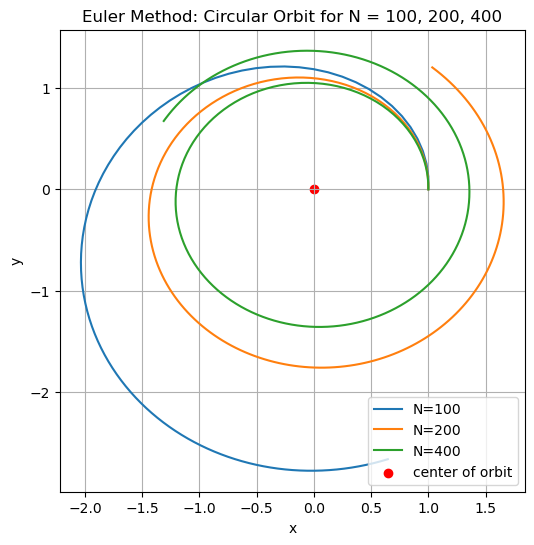

In [22]:
# Exercise 2

import numpy as np
import matplotlib.pyplot as plt


def acceleration(r, GM=1.0):
    x, y = r
    rmag = np.sqrt(x*x + y*y)
    return -GM * r / rmag**3



def orbit_solve(r0, v0, tmax, N, method='euler'):
    dt = tmax / (N - 1)   #time step

    t = np.linspace(0, tmax, N)
    r = np.zeros((N, 2))
    v = np.zeros((N, 2))

    r[0] = r0
    v[0] = v0

    if method == 'euler':
        for i in range(N - 1):
            a = acceleration(r[i])
            r[i+1] = r[i] + v[i] * dt
            v[i+1] = v[i] + a * dt

    return t, r, v


#---

GM = 1.0

# choosing initial position
r0 = np.array([1.0, 0.0])

# circular velocity magnitude v = sqrt(GM/r)
rmag = np.linalg.norm(r0)
v_circ = np.sqrt(GM / rmag)


v0 = np.array([0.0, v_circ])

# period of circular orbit
T = 2 * np.pi * np.sqrt(rmag**3 / GM)

# integrate for 2 periods
tmax = 2 * T

# three different N values
N_values = [100, 200, 400]

plt.figure(figsize=(6,6))

for N in N_values:
    t, r, v = orbit_solve(r0, v0, tmax, N, method='euler')
    plt.plot(r[:,0], r[:,1], label=f"N={N}")
    
plt.scatter([0],[0], color='red', label='center of orbit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler Method: Circular Orbit for N = 100, 200, 400")
plt.grid(True)
plt.legend()
plt.axis
plt.show()




In [11]:
# Exercise 3
import numpy as np

def orbit_solve(r0, v0, tmax, N, method='euler'):
    GM = 1.0 
    dt = tmax / (N - 1)

    # arrays for t, position and velocity
    t = np.linspace(0, tmax, N)
    r = np.zeros((N, 2))
    v = np.zeros((N, 2))

    # initial conditions
    r[0] = r0
    v[0] = v0

    # function for acceleration a = -GM r / r^3
    def accel(r):
        rmag = np.sqrt(r[0]**2 + r[1]**2)
        return -GM * r / rmag**3



    for i in range(N - 1):

        if method == 'euler':
            # this is the euler method
            a = accel(r[i])
            r[i+1] = r[i] + dt * v[i]
            v[i+1] = v[i] + dt * a

        elif method == 'euler-cromer':
            # then the euler cromer method
            a = accel(r[i])
            v[i+1] = v[i] + dt * a
            r[i+1] = r[i] + dt * v[i+1]

        elif method == 'verlet':
            # and finally the verlet (or verlocity verlet)
            a_i = accel(r[i])
            # new position
            r[i+1] = r[i] + v[i]*dt + 0.5*a_i*dt**2
            # Acceleration at new position
            a_ip1 = accel(r[i+1])
            # new velocity
            v[i+1] = v[i] + 0.5*(a_i + a_ip1)*dt

        else:
            raise ValueError("Unknown method. Choose: 'euler', 'euler-cromer', or 'verlet'.")

    return t, r, v


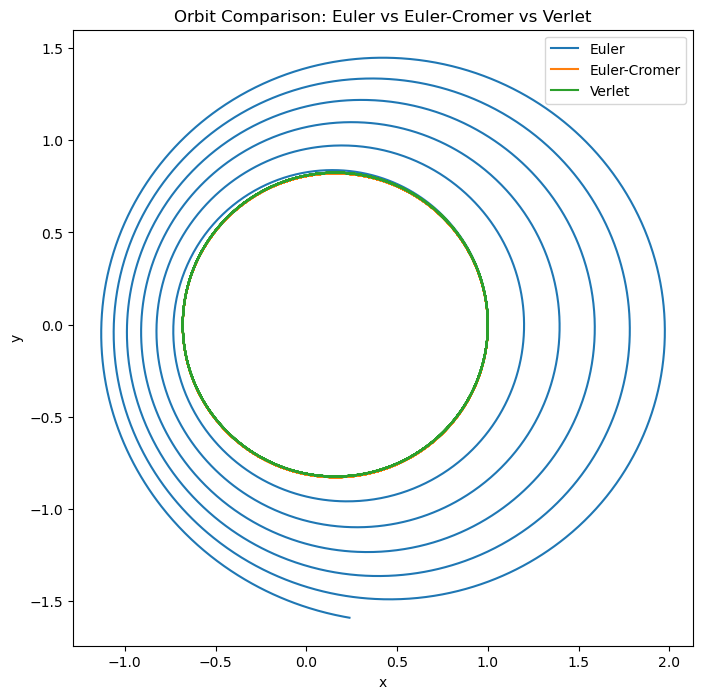

The euler method appears as a spiral, not accurate. The euler cromer method is far more accurate, a circular orbit. The Verlet Method is finally the most accurate, with a circular orbit, from the second order method!


In [19]:
# Exercise 4

# initial conditionss
r0 = np.array([1.0, 0.0]) # starting at x=1, y=0
v0 = np.array([0.0, 0.9])  # initial velocity 
tmax = 50.0
N = 5000

# Euler method
t_e, r_e, v_e = orbit_solve(r0, v0, tmax, N, method='euler')

# Euler-Cromer Method
t_ec, r_ec, v_ec = orbit_solve(r0, v0, tmax, N, method='euler-cromer')

# Verlet Method
t_v, r_v, v_v = orbit_solve(r0, v0, tmax, N, method='verlet')

# Plotting the orbits (from the different methods)
plt.figure(figsize=(8, 8))
plt.plot(r_e[:,0], r_e[:,1], label='Euler')
plt.plot(r_ec[:,0], r_ec[:,1], label='Euler-Cromer')
plt.plot(r_v[:,0], r_v[:,1], label='Verlet')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Comparison: Euler vs Euler-Cromer vs Verlet')
plt.legend()
plt.show()

# comparison

print("The euler method appears as a spiral, not accurate. The euler cromer method is far more accurate, a circular orbit. The Verlet Method is finally the most accurate, with a circular orbit, from the second order method!")